In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

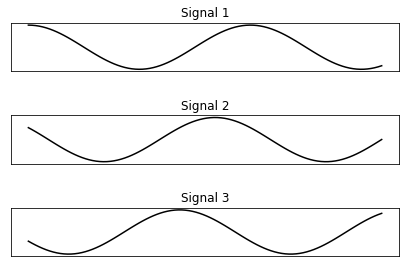

In [3]:


# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?

fig, axes = plt.subplots(nrows=3, ncols=1)

axes[0].plot(x, y1, color = 'k')
axes[0].set(title = names[0])

axes[1].plot(x, y2, color = 'k')
axes[1].set(title = names[1])

axes[2].plot(x, y3, color = 'k')
axes[2].set(title = names[2])
fig.tight_layout()
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    

plt.show()

In [4]:
df = pd.read_csv(r'./HospitalAdmissionsData.csv')


In [5]:
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [6]:
df.info()
# 4 integers
#1 float
# admission typer, insurance type, religion type,  race, and Dx are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [7]:
#values for insurance type

df.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [8]:
# summary stats for admission type

df.Admission_Type.describe()

count         58863
unique            4
top       emergency
freq          41987
Name: Admission_Type, dtype: object

In [9]:
# most common admission type, insurance type, religion type, race, and diagnosis 

df.describe(include = "object")

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


In [ ]:
df['Admission_Type'].hist()

plt.title("Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts")
plt.show()


In [ ]:
df["Admission_Type"].hist(log = True)

plt.title("Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Counts")

In [10]:
df['Admission_Type']

0         elective
1         elective
2        emergency
3         elective
4         elective
5         elective
6         elective
7         elective
8         elective
9         elective
10       emergency
11        elective
12       emergency
13        elective
14        elective
15        elective
16        elective
17       emergency
18        elective
19        elective
20        elective
21        elective
22        elective
23        elective
24        elective
25        elective
26       emergency
27        elective
28       emergency
29       emergency
           ...    
58833    emergency
58834    emergency
58835    emergency
58836    emergency
58837    emergency
58838    emergency
58839    emergency
58840    emergency
58841    emergency
58842    emergency
58843    emergency
58844    emergency
58845    emergency
58846    emergency
58847    emergency
58848    emergency
58849    emergency
58850    emergency
58851       urgent
58852    emergency
58853    emergency
58854    eme

In [13]:
#Compare the average length of admission between those who died versus those who did not die.

df2 =df.groupby("Death_1").mean()
df2

,ID,AdmissionLengthDays,EnglishLanguage_1,Married_1
Death_1,,,,
0,29484.310219,10.140012,0.576748,0.406765
1,29724.728811,10.129606,0.519651,0.446001


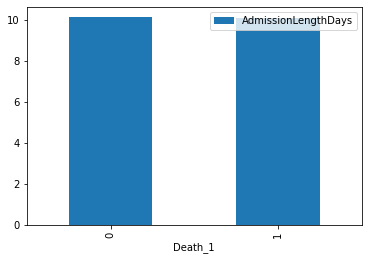

In [12]:
df2.plot.bar(y = ["AdmissionLengthDays"])

In [14]:
#Describe the association between death and insurance type and show a visualization or test

crosstable = pd.crosstab(df["Death_1"],df["Insurance_Type"])

In [15]:
chi= stats.chi2_contingency(crosstable)
print(chi)

(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))


In [16]:
# bar chart for death and insurance type

df3 = df.groupby("Death_1").count()
print(df3)

            ID  AdmissionLengthDays  Admission_Type  Insurance_Type  \
Death_1                                                               
0        53011                53011           53011           53011   
1         5852                 5852            5852            5852   

         EnglishLanguage_1  Religion_Type  Married_1   Race     Dx  
Death_1                                                             
0                    53011          52653      53011  53011  53011  
1                     5852           5755       5852   5852   5852  
